In [514]:
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
file_path = r"C:\Users\ruben\OneDrive\Schoolzaken\Hogeschool Fontys 2023-2024\FINNTASTIC\Nutrition Data\Nutrition-Summary-2023-09-18-to-2023-11-13.csv"
df = pd.read_csv(file_path)
df.head(5)


,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2023-09-20,Breakfast,421.5,13.7,2.7,0.1,0.0,0.0,0.0,38.3,422.4,62.0,5.4,20.9,16.5,5.0,17.1,0.6,1.7,NaN
1,2023-09-20,Dinner,767.0,27.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,0.0,0.0,50.6,0.0,0.0,0.0,0.0,NaN
2,2023-09-20,Lunch,1183.0,54.6,5.4,11.0,0.0,0.0,0.0,0.6,0.0,129.6,12.8,13.5,47.8,0.0,0.0,0.0,0.0,NaN
3,2023-09-20,Snacks,1242.8,67.5,14.0,0.0,0.0,0.3,12.2,128.0,684.4,73.9,6.6,27.3,91.3,0.0,116.2,316.0,15.1,NaN
4,2023-09-21,Breakfast,374.5,12.4,2.0,0.0,0.0,0.0,0.0,36.8,0.0,55.2,3.9,6.0,14.3,0.0,0.0,0.0,0.0,NaN


In [515]:

# Convert date column to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum values
summed_data = df.groupby('Date').sum().reset_index()

#11['Calories','Fat (g)','Carbohydrates (g)','Protein (g)']
# Display the summed data
print(summed_data)


         Date  Calories  Fat (g)  Saturated Fat  Polyunsaturated Fat  \
0  2023-09-20    3614.3    163.2           22.1                 11.1   
1  2023-09-21    3238.8    156.8           20.0                  0.0   
2  2023-09-22    3170.2    133.4           12.4                  6.0   
3  2023-09-23    3429.3     61.7            2.1                  2.0   
4  2023-09-24    3215.0    133.8           28.9                  9.1   
5  2023-09-25    3403.1    136.7           18.7                  0.6   
6  2023-09-26    2839.2    103.1           23.2                  8.6   
7  2023-09-27    3491.4    120.1           41.8                 17.1   
8  2023-09-28    3075.8    103.0           30.5                  2.1   
9  2023-09-29    3078.7    114.4           20.9                 21.1   
10 2023-10-01    3443.5    156.3           33.1                  7.7   
11 2023-10-02    2813.8    108.6           17.0                 14.0   
12 2023-10-03    2631.8     75.3           21.7                 

C:\Users\ruben\AppData\Local\Temp\ipykernel_15460\503773258.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_data = df.groupby('Date').sum().reset_index()


In [516]:
calories = summed_data['Calories']
calories

0     3614.3
1     3238.8
2     3170.2
3     3429.3
4     3215.0
5     3403.1
6     2839.2
7     3491.4
8     3075.8
9     3078.7
10    3443.5
11    2813.8
12    2631.8
13    3603.9
14    3769.7
15    2710.6
16    3966.3
17    3258.7
18    3699.7
19    3618.5
20    2924.0
21    3780.6
22    3510.1
23    2849.1
24    3022.5
25    2732.0
26    3358.9
27    3936.1
28    2704.0
29    3055.6
30    3262.5
31    3411.3
32    3576.6
Name: Calories, dtype: float64

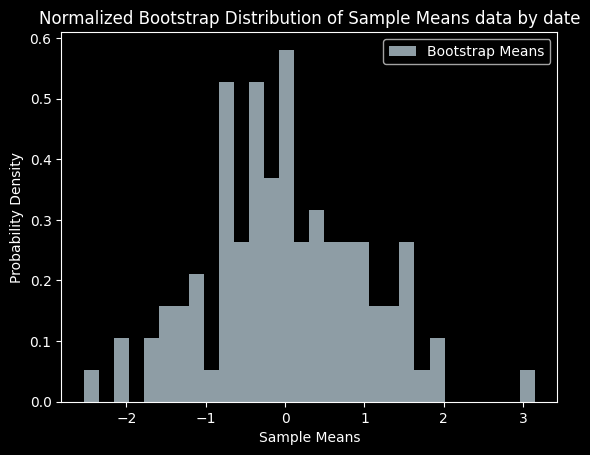

In [517]:
# Sample data (replace with your dataset)
data = (calories)

# Number of bootstrap samples
num_samples = 100

# Number of resampled data points in each sample
sample_size = len(calories)

# Store the means of the bootstrap samples
bootstrap_means = []

# Perform bootstrapping
for _ in range(num_samples):
    
    # Resample the data with replacement
    resampled_data = np.random.choice(calories, size=sample_size, replace=True)
    
    # Calculate the mean of the resampled data - 763.702380952381
    resampled_mean = np.mean(resampled_data)
    
    #Calculate the standard deviation of the resampled data
    #resampled_std = np.std(resampled_data)
    
    # Store the resampled mean
    bootstrap_means.append(resampled_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Normalize the histogram values by dividing by the total area
#hist, bins, _ = plt.hist(bootstrap_means, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means')
#bin_width = bins[1] - bins[0]
mean_value=np.mean(bootstrap_means)
std_value=np.std(bootstrap_means)
normalized_bootstrap =(bootstrap_means-mean_value)/std_value
hist, bins, _ = plt.hist(normalized_bootstrap, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means')

# Plot the normalized histogram
#plt.bar(bins[:-1], normalized_bootstrap, align='center', alpha=0.4, color='#FF8C76', label='Normalized Bootstrap Means')
#plt.axvline(x=np.mean(calories), alpha=0.6, color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Normalized Bootstrap Distribution of Sample Means data by date')
plt.legend()


# Add a shaded area for the confidence interval
#plt.axvspan(confidence_interval[0], confidence_interval[1], alpha=0.3, color='#70B600', label='95% Confidence Interval')

# Display the results
plt.legend()
plt.show()


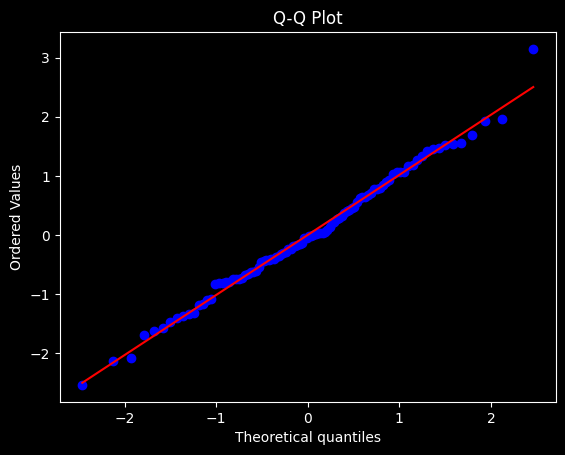

In [518]:
# Q-Q plot for HR data
stats.probplot(normalized_bootstrap,dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

C:\Users\ruben\AppData\Local\Temp\ipykernel_15460\2373306717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = summed_data.corr()


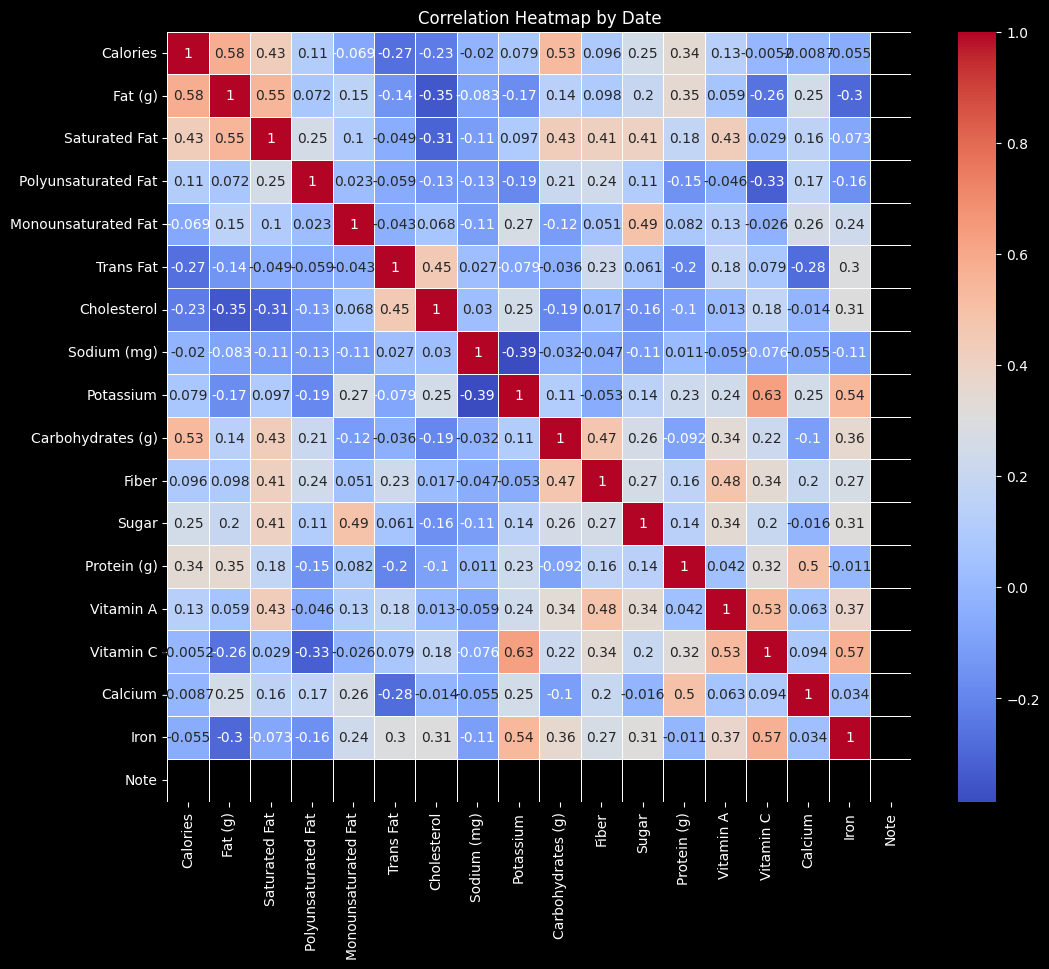

In [519]:
correlation_matrix = summed_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap by Date')
plt.show()

Mean value: 3278.65
Median value: 3262.50
Mode value: 3465.86


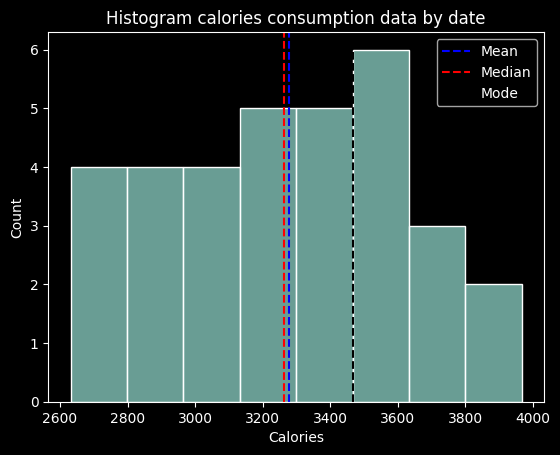

In [520]:
num_bins = 8

ax1 = sns.histplot(calories,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_cal = np.mean(calories) #calculate mean
med_cal = np.median(calories) #calculate median
#draw the lines:
ax1.axvline(avg_cal, color="b",ls ="--" )
ax1.axvline(med_cal, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(calories, bins=num_bins)
#find the value for which the count is the maximum:
mode_cal = val[np.argmax(count)]
#plot
ax1.axvline(mode_cal, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram calories consumption data by date")

print("Mean value: %.2f" % avg_cal)
print("Median value: %.2f" % med_cal)
print("Mode value: %.2f" % mode_cal)


Text(0.5, 1.0, 'Calorie consumption probability data by date')

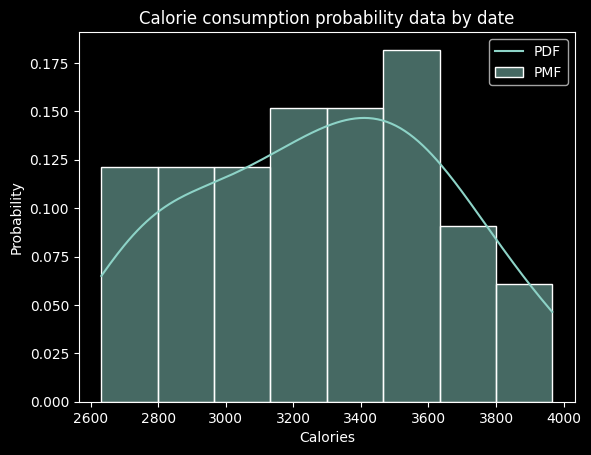

In [521]:
ax2 = sns.histplot(calories,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Calorie consumption probability data by date")

# This tells u the probaiblity of Finn consuming above his minimum calories

In [522]:
def probability_above_value(calories, min_cal):
    # Calculate the mean and standard deviation of the data
    mean_c = calories.mean()
    std_dev_c = calories.std()
    
    # Calculate the probability using the cumulative distribution function (CDF)
    probability_c = 1 - stats.norm.cdf(min_cal, loc=mean_c, scale=std_dev_c)
    
    return probability_c

# Selected value
min_cal = 3270

# Calculate the probability
prob_c = probability_above_value(calories, min_cal)

print(f"The probability of Finn consuming above {min_cal} calories is {prob_c:.2f}")

The probability of Finn consuming above 3270 calories is 0.51


In [523]:
fats = summed_data['Fat (g)']
fats

0     163.2
1     156.8
2     133.4
3      61.7
4     133.8
5     136.7
6     103.1
7     120.1
8     103.0
9     114.4
10    156.3
11    108.6
12     75.3
13    181.1
14    148.1
15    115.1
16    170.1
17    151.9
18    175.3
19    150.7
20    139.5
21    151.5
22    189.1
23    125.2
24    117.7
25    148.4
26    171.6
27    165.1
28    131.2
29    107.6
30    159.8
31    128.5
32    139.5
Name: Fat (g), dtype: float64

Mean value: 137.38
Median value: 139.50
Mode value: 125.40


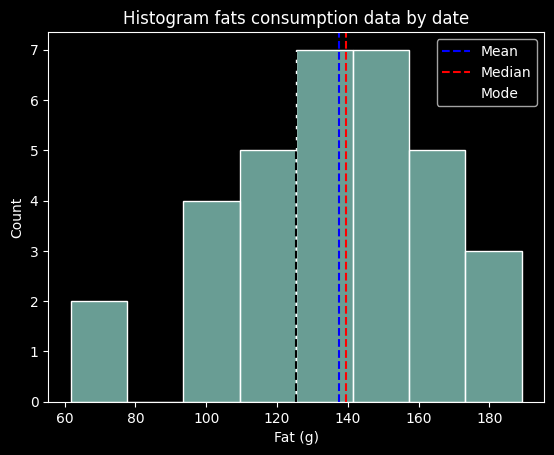

In [524]:
num_bins = 8

ax1 = sns.histplot(fats,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fat = np.mean(fats) #calculate mean
med_fat = np.median(fats) #calculate median
#draw the lines:
ax1.axvline(avg_fat, color="b",ls ="--" )
ax1.axvline(med_fat, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(fats, bins=num_bins)
#find the value for which the count is the maximum:
mode_fat = val[np.argmax(count)]
#plot
ax1.axvline(mode_fat, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption data by date")

print("Mean value: %.2f" % avg_fat)
print("Median value: %.2f" % med_fat)
print("Mode value: %.2f" % mode_fat)

Text(0.5, 1.0, 'Fats consumption probability data by date')

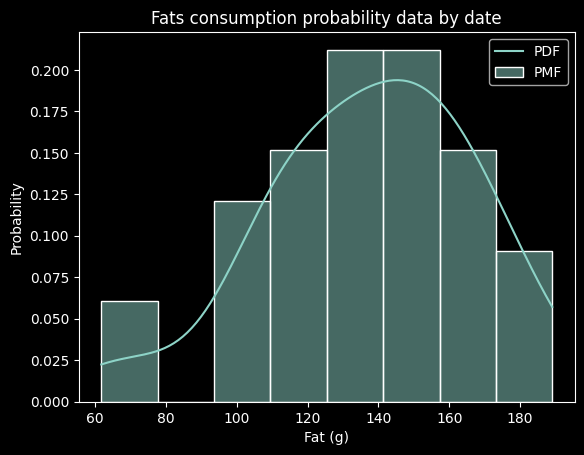

In [525]:
ax2 = sns.histplot(fats,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Fats consumption probability data by date")

In [526]:
carbs = summed_data['Carbohydrates (g)']
carbs

0     345.1
1     282.2
2     232.1
3     292.5
4     268.3
5     276.8
6     332.4
7     312.6
8     297.9
9     315.3
10    365.9
11    256.4
12    346.6
13    278.5
14    371.5
15    272.6
16    296.9
17    368.3
18    363.8
19    427.2
20    237.0
21    364.2
22    338.8
23    220.6
24    365.9
25    223.9
26    280.6
27    438.9
28    262.2
29    366.0
30    327.6
31    428.2
32    362.7
Name: Carbohydrates (g), dtype: float64

Mean value: 318.77
Median value: 315.30
Mode value: 351.58


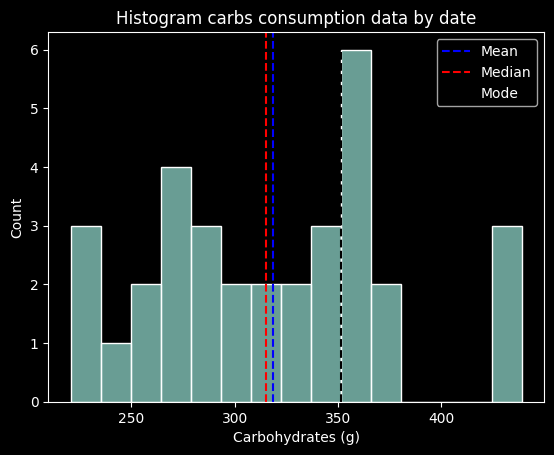

In [527]:
num_bins = 15

ax1 = sns.histplot(carbs,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_carbs = np.mean(carbs) #calculate mean
med_carbs = np.median(carbs) #calculate median
#draw the lines:
ax1.axvline(avg_carbs, color="b",ls ="--" )
ax1.axvline(med_carbs, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(carbs, bins=num_bins)
#find the value for which the count is the maximum:
mode_carbs = val[np.argmax(count)]
#plot
ax1.axvline(mode_carbs, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram carbs consumption data by date")

print("Mean value: %.2f" % avg_carbs)
print("Median value: %.2f" % med_carbs)
print("Mode value: %.2f" % mode_carbs)

Text(0.5, 1.0, 'Carbs consumption probability data by date')

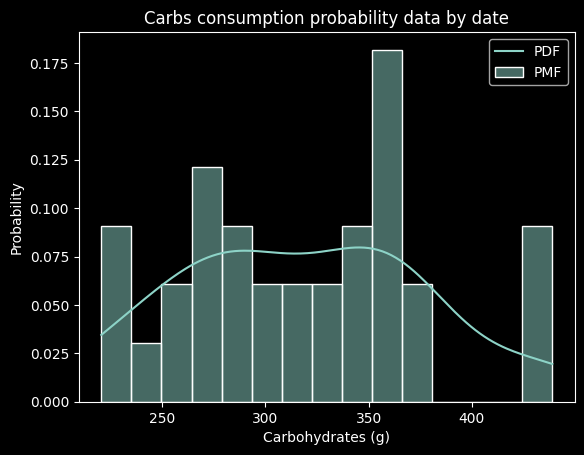

In [528]:
ax2 = sns.histplot(carbs,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Carbs consumption probability data by date")

In [529]:
prot = summed_data['Protein (g)']
prot

0     206.2
1     187.8
2     217.9
3     154.3
4     200.9
5     262.1
6     154.3
7     116.8
8     256.5
9     111.3
10    196.7
11    207.6
12    159.3
13    227.8
14    226.6
15    148.7
16    223.1
17    188.6
18    184.1
19    214.3
20    221.7
21    249.8
22    202.8
23    215.6
24    157.3
25    180.1
26    174.2
27    184.1
28    158.5
29    174.8
30    163.3
31    173.4
32    212.8
Name: Protein (g), dtype: float64

Mean value: 191.31
Median value: 188.60
Mode value: 205.55


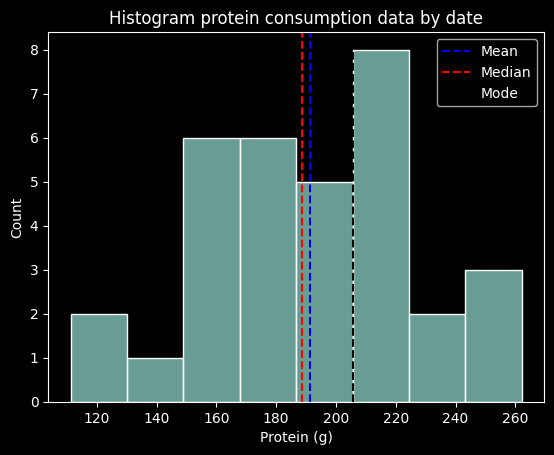

In [530]:
num_bins = 8

ax1 = sns.histplot(prot,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_prot = np.mean(prot) #calculate mean
med_prot = np.median(prot) #calculate median
#draw the lines:
ax1.axvline(avg_prot, color="b",ls ="--" )
ax1.axvline(med_prot, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(prot, bins=num_bins)
#find the value for which the count is the maximum:
mode_prot = val[np.argmax(count)]
#plot
ax1.axvline(mode_prot, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram protein consumption data by date")

print("Mean value: %.2f" % avg_prot)
print("Median value: %.2f" % med_prot)
print("Mode value: %.2f" % mode_prot)

Text(0.5, 1.0, 'Protein consumption probability data by date')

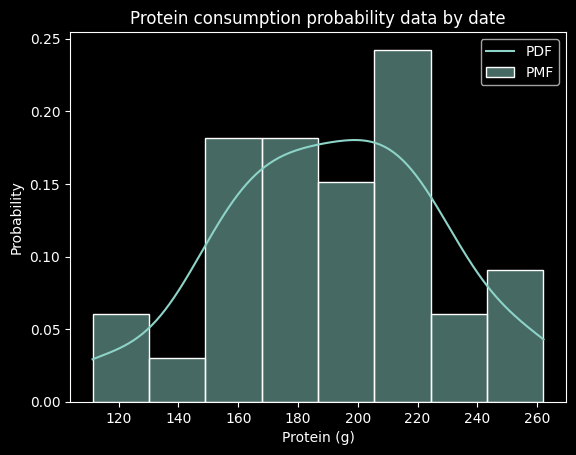

In [531]:
ax2 = sns.histplot(prot,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Protein consumption probability data by date")

# This tells u the probability of Finn consuming the minimum amount of protein

In [532]:
def probability_above_value(prot, min_prot):
    # Calculate the mean and standard deviation of the data
    mean_p = prot.mean()
    std_dev_p = prot.std()
    
    # Calculate the probability using the cumulative distribution function (CDF)
    probability_p = 1 - stats.norm.cdf(min_prot, loc=mean_p, scale=std_dev_p)
    
    return probability_p

weight=82
r_prot=2
# Selected value
min_prot = weight*r_prot

# Calculate the probability
prob_p = probability_above_value(prot, min_prot)

print(f"The probability of Finn consuming above {min_prot} grams of protein is {prob_p:.2f}")

The probability of Finn consuming above 164 grams of protein is 0.77


In [533]:
#calories in all macros 
mean_prot_cal=prot.mean()*4
print (mean_prot_cal)

mean_carb_cal=carbs.mean()*4
print (mean_carb_cal)

mean_fat_cal=fats.mean()*9
print (mean_fat_cal)

765.2484848484848
1275.090909090909
1236.3818181818183


In [534]:
def get_day_of_week(date):
    day_of_week = date.strftime('%A')  # %A returns the full day name
    return day_of_week

# Apply the function to create a new 'DayOfWeek' column
summed_data['DayOfWeek'] =summed_data['Date'].apply(get_day_of_week)

# Print the DataFrame
print(summed_data)

         Date  Calories  Fat (g)  Saturated Fat  Polyunsaturated Fat  \
0  2023-09-20    3614.3    163.2           22.1                 11.1   
1  2023-09-21    3238.8    156.8           20.0                  0.0   
2  2023-09-22    3170.2    133.4           12.4                  6.0   
3  2023-09-23    3429.3     61.7            2.1                  2.0   
4  2023-09-24    3215.0    133.8           28.9                  9.1   
5  2023-09-25    3403.1    136.7           18.7                  0.6   
6  2023-09-26    2839.2    103.1           23.2                  8.6   
7  2023-09-27    3491.4    120.1           41.8                 17.1   
8  2023-09-28    3075.8    103.0           30.5                  2.1   
9  2023-09-29    3078.7    114.4           20.9                 21.1   
10 2023-10-01    3443.5    156.3           33.1                  7.7   
11 2023-10-02    2813.8    108.6           17.0                 14.0   
12 2023-10-03    2631.8     75.3           21.7                 

In [535]:
# Calculate the end date (last date in the dataset)
end_date = summed_data['Date'].max()

# Calculate the start date (end date - 7 days)
start_date = end_date - timedelta(days=6)

# Filter the DataFrame for the last week
last_week_data = summed_data[(summed_data['Date'] >= start_date) & (summed_data['Date'] <= end_date)]

last_week_data.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note,DayOfWeek
28,2023-11-06,2704.0,131.2,25.5,8.0,12.2,6.0,384.4,1127.5,845.2,262.2,15.3,65.2,158.5,0.0,0.0,36.2,32.9,0.0,Monday
29,2023-11-08,3055.6,107.6,18.1,2.7,1.7,6.0,141.9,4018.7,421.6,366.0,46.1,81.2,174.8,48.8,212.8,40.4,38.0,0.0,Wednesday
30,2023-11-09,3262.5,159.8,25.6,7.1,3.1,0.0,35.0,1118.6,407.8,327.6,15.4,79.9,163.3,0.0,0.0,22.1,8.2,0.0,Thursday
31,2023-11-10,3411.3,128.5,37.9,0.0,6.0,0.0,92.5,1943.7,1455.0,428.2,22.3,86.5,173.4,22.5,198.8,29.3,28.5,0.0,Friday
32,2023-11-12,3576.6,139.5,37.6,2.3,2.0,0.0,123.6,3937.2,405.0,362.7,37.0,92.2,212.8,53.0,238.0,50.2,30.5,0.0,Sunday


In [536]:
# Selecting specific columns
selected_columns = ['Date', 'Protein (g)', 'Fat (g)', 'Carbohydrates (g)', 'DayOfWeek']

# Creating a new DataFrame with selected columns
new_table = last_week_data[selected_columns]

new_table = new_table.iloc[-5:]
new_table.head(5)

,Date,Protein (g),Fat (g),Carbohydrates (g),DayOfWeek
28,2023-11-06,158.5,131.2,262.2,Monday
29,2023-11-08,174.8,107.6,366.0,Wednesday
30,2023-11-09,163.3,159.8,327.6,Thursday
31,2023-11-10,173.4,128.5,428.2,Friday
32,2023-11-12,212.8,139.5,362.7,Sunday


In [537]:
new_table['Protein (g)'] *= 4
new_table['Fat (g)'] *= 9
new_table['Carbohydrates (g)'] *= 4


new_table2 = new_table.iloc[-5:]
new_table2.head(5)

,Date,Protein (g),Fat (g),Carbohydrates (g),DayOfWeek
28,2023-11-06,634.0,1180.8,1048.8,Monday
29,2023-11-08,699.2,968.4,1464.0,Wednesday
30,2023-11-09,653.2,1438.2,1310.4,Thursday
31,2023-11-10,693.6,1156.5,1712.8,Friday
32,2023-11-12,851.2,1255.5,1450.8,Sunday


In [538]:
prot_lw = last_week_data['Protein (g)']
print(prot_lw)

fat_lw = last_week_data['Fat (g)']
print(fat_lw)

carbs_lw = last_week_data['Carbohydrates (g)']
print(carbs_lw)

28    158.5
29    174.8
30    163.3
31    173.4
32    212.8
Name: Protein (g), dtype: float64
28    131.2
29    107.6
30    159.8
31    128.5
32    139.5
Name: Fat (g), dtype: float64
28    262.2
29    366.0
30    327.6
31    428.2
32    362.7
Name: Carbohydrates (g), dtype: float64


In [539]:
dw=last_week_data['DayOfWeek']
print(dw)

28       Monday
29    Wednesday
30     Thursday
31       Friday
32       Sunday
Name: DayOfWeek, dtype: object


In [540]:
number_sentences = 3
max_tokens = 300

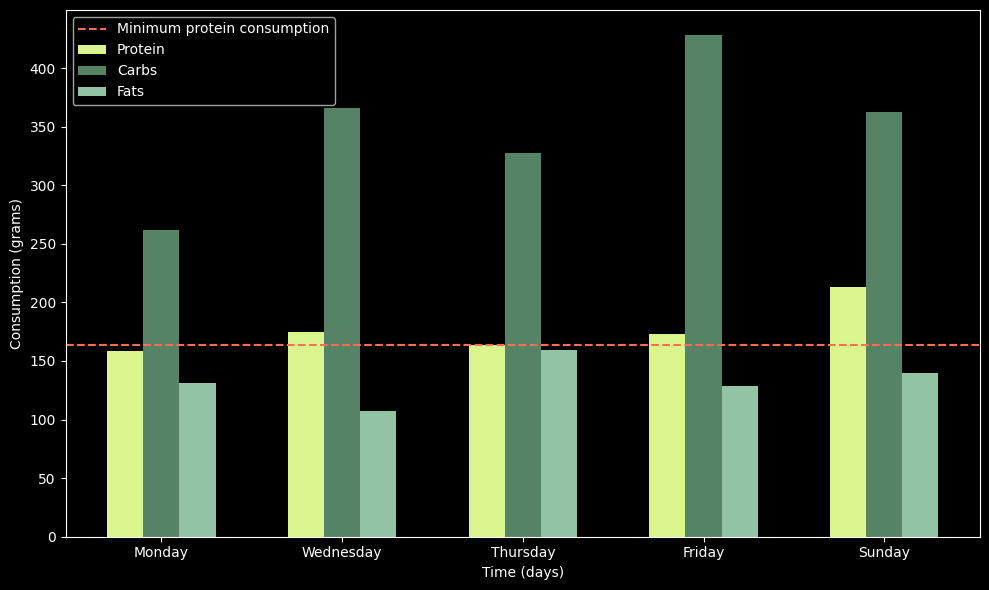

In [546]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

plt.style.use('dark_background')
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, 6, ncolors, endpoint=False)

# Bar widthx
bar_width = 0.2

# Space between groups of bars
group_spacing = 0.2

# Create x-axis positions for the bars (0, 1, 2, 3, 4)
x = range(len(dw))

# Create bars for the values
plt.bar(x, prot_lw, width=bar_width, label='Protein', align='center',  color='#dbf58e')
plt.bar([i + group_spacing for i in x], carbs_lw, width=bar_width, label='Carbs', align='center',  color='#568265')
plt.bar([i + 2 * group_spacing for i in x], fat_lw, width=bar_width, label='Fats', align='center', color='#92c3a4')

# Set the x-axis positions for labels right under the bars
label_positions = [i + bar_width for i in x]


# Set x-axis labels
#plt.xticks(x, 'Protein')
#plt.xticks([i + group_spacing for i in x], 'Carbs')
#plt.xticks([i + 2 * group_spacing for i in x], 'Fats')
plt.xticks(label_positions, dw)

# Set y-axis label
plt.ylabel('Consumption (grams)')
plt.xlabel('Time (days)')

# Add a horizontal line at a minimum protein intake
plt.axhline(y=min_prot, color='#FB6E52', linestyle='--', label=f'Minimum protein consumption')

# Add a legend
plt.legend(loc="upper left")
            
# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()

In [547]:
prot_lw_cal = last_week_data['Protein (g)']*4
print(prot_lw_cal)

fat_lw_cal = last_week_data['Fat (g)']*9
print(fat_lw_cal)

carbs_lw_cal = last_week_data['Carbohydrates (g)']*4
print(carbs_lw_cal)

28    634.0
29    699.2
30    653.2
31    693.6
32    851.2
Name: Protein (g), dtype: float64
28    1180.8
29     968.4
30    1438.2
31    1156.5
32    1255.5
Name: Fat (g), dtype: float64
28    1048.8
29    1464.0
30    1310.4
31    1712.8
32    1450.8
Name: Carbohydrates (g), dtype: float64


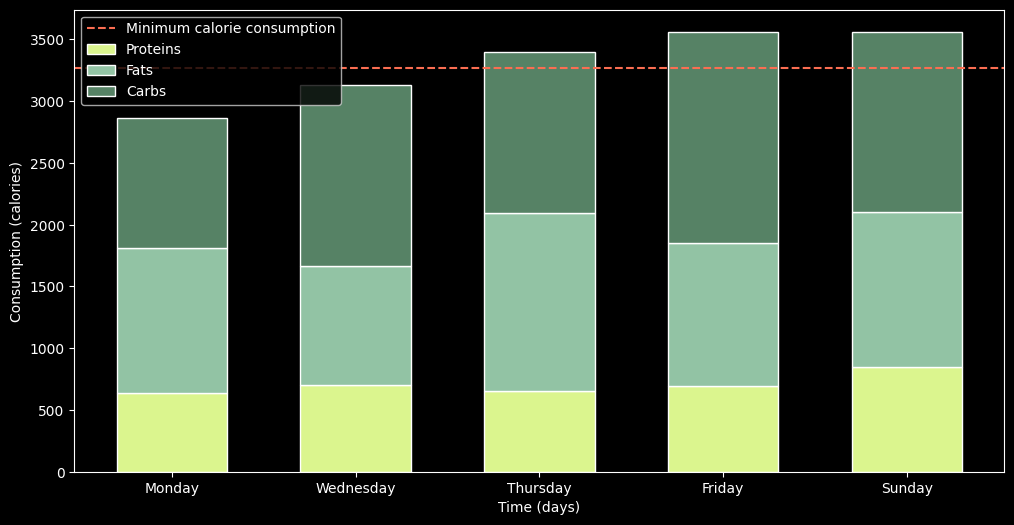

In [548]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and set the figure size
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.6

# Create x-axis positions for the bars (0, 1, 2, 3, 4)
x = np.arange(len(dw))

# Create bars for the values
plt.bar(x, prot_lw_cal, width=bar_width, label='Proteins', edgecolor='white', color='#dbf58e')
plt.bar(x, fat_lw_cal, width=bar_width, bottom=prot_lw_cal, label='Fats', edgecolor='white', color='#92c3a4')
plt.bar(x, carbs_lw_cal, width=bar_width, bottom=np.array(prot_lw_cal) + np.array(fat_lw_cal), label='Carbs', edgecolor='white', color='#568265')

# Set the x-axis positions for labels right under the bars
label_positions = x + .0005 * bar_width

# Set x-axis labels
plt.xticks(label_positions, dw,)  # Center the labels

# Add a horizontal line at a minimum protein intake
plt.axhline(y=min_cal, color='#FB6E52', linestyle='--', label=f'Minimum calorie consumption')
# Add labels and title

plt.xlabel('Time (days)')
plt.ylabel('Consumption (calories)')

# Add a legend
plt.legend(loc="upper left")

# Show the plot
plt.show()
